 # Assignment 13 - SHAP for interpretabilityof income prediction on standard adult census income dataset

## Understanding the Problem Statement --------Problem Scoping

Income prediction on standard adult census income dataset

**Note for Facilitators:**
- You can ask students to write their answers in the space provided in this notebook. **They must prefix answers with #.**
Else answers will be interpreted as code by the Jupyter Notebook resulting in errors.
- **Students must run each cell one by one** as they go through the notebook. This will **strengthen their understanding** of the SHAP implementation. Also **it will help them with their answers**.
- Students can also write answers along with the questions in a seperate file as instructed by you.

**XGBoost** is an an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

https://www.youtube.com/watch?v=OtD8wVaFm6E

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

XGBoost can be used in a variety of applications, including Kaggle competitions, recommendation systems, and click-through rate prediction, among others. It is also highly customizable and allows for fine-tuning of various model parameters to optimize performance.

More about XGBoost can be read from this site - https://xgboost.readthedocs.io/en/stable/

The output of Decision Trees, Linear Regression, and Logistic Regression algorithms are easier to understand
as compared to that of Random Forest and Neural Networks.

That is why ** SHAP** is commonly used to explain the output of **Random Forests, Neural Networks, and Ensemble Machine Learning models**.

XGBoost is an **Ensemble Machine Learning Algorithm** that will be used to solve this problem.

# Dataset Description

**Adult income dataset** is used that involves **predicting personal income levels as above or below $50,000 per year** based on
personal details such as relationship and education level.

There are **two class values ‘>50K‘ and ‘<=50K‘**

**Listing of attributes-**

age: continuous attribute

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous attribute

capital-loss: continuous attribute
hours-per-week: continuous attribute

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



# SHAP

**The predefied dataset in SHAP repository** is already **clean (no missing values)**, and all **categorical values are already converted to numeric values**. Thus **no preprocessing** is required and hence all the **focus will be on calculating SHAP values and interpreting graphs**.

#### Install pip and shap beforehand if you have not already

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.8 MB/s eta 0:00:00


The originl dataset can be viewed from here
https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
!pip install xgboost

###### A look at the dataset (all values are already in numeric format, and there are no missing values)

In [4]:
shap.datasets.adult(display=False)

(        Age  Workclass  Education-Num  Marital Status  Occupation  \
 0      39.0          7           13.0               4           1   
 1      50.0          6           13.0               2           4   
 2      38.0          4            9.0               0           6   
 3      53.0          4            7.0               2           6   
 4      28.0          4           13.0               2          10   
 ...     ...        ...            ...             ...         ...   
 32556  27.0          4           12.0               2          13   
 32557  40.0          4            9.0               2           7   
 32558  58.0          4            9.0               6           1   
 32559  22.0          4            9.0               4           1   
 32560  52.0          5            9.0               2           4   
 
        Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
 0                 0     4    1        2174.0           0.0            40.0   


As we can see, there are __12 features__ and __one array__ that holds either __True or False__ value for __all 32561 rows__.
__True__ signifies that income of the person is __>50k__ And
__False__ signifies that income is __<=50k__

###### import dataset from SHAP and build the model

In [5]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)


##### Display the top 5 rows of dataframe X (containing 12 features).

In [6]:
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


##### Also we can display y which is the array representation of target variable

In [7]:
y

array([False, False, False, ..., False, False,  True])

##### Compute SHAP values for all 12 features

In [8]:
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

100%|===================| 32545/32561 [01:56<00:00]       

In [9]:
shap_values

.values =
array([[ 5.95425580e-01, -4.58633699e-01,  3.87174999e-01, ...,
        -8.70954163e-02, -1.99409479e-01,  3.42254382e-02],
       [ 1.04104975e+00, -3.48955381e-01,  5.63579724e-01, ...,
        -9.94380730e-02, -1.62471393e+00,  4.11868767e-02],
       [ 3.57663236e-01, -2.75001619e-04, -4.93422828e-01, ...,
        -8.80035448e-02, -1.44724053e-01,  2.05118779e-02],
       ...,
       [ 1.18296097e+00,  3.35004809e-04, -3.73861511e-01, ...,
        -8.02874350e-02, -1.59453755e-01,  5.42146165e-02],
       [-1.91623856e+00, -2.50196545e-02, -4.12581469e-01, ...,
        -9.75276301e-02, -1.58804273e+00, -2.38128340e-03],
       [ 8.52208947e-01,  1.19914867e-01, -2.49582741e-01, ...,
        -3.12689438e-02,  9.36303726e-02,  3.73075821e-02]])

.base_values =
array([-2.48532877, -2.48532877, -2.48532877, ..., -2.48532877,
       -2.48532877, -2.48532877])

.data =
array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9.,

# For analysis of the global effect of the features we can use the following plots.

# Bar Plot

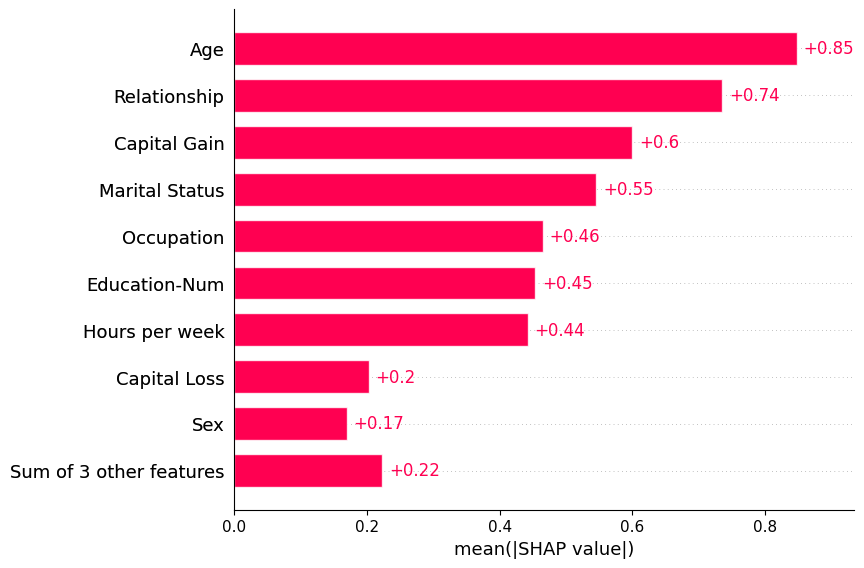

In [10]:
shap.plots.bar(shap_values)

In [11]:
# Quest 1:  Which is the most important feature here ?

# Ans1: Age is the most important feature here.

In [12]:
# Quest2:  What does 'Sum of 3 other features' indicate in the graph ?

# Ans2: The least important features that have hardly any effect on the final prediction are represented by 'Sum of 3 other features'

In [13]:
# Quest3: Can you tell in which way features are affecting the final prediction - in a negative way or positive way ?

# Ans3: Since the SHAP values represented in this graph are absolute in nature, it is not possible to tell whether
# they are effecting the final predictions in a positive or negative way.

# Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


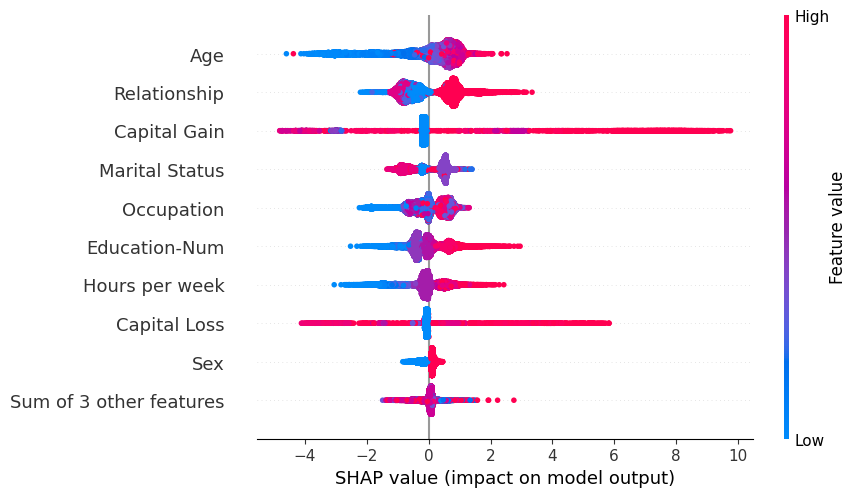

In [14]:
shap.plots.beeswarm(shap_values)

In [15]:
# Quest 4: As the age of a person increases, will it have a positive or negative impact on the final prediction ?
# Note: positive means income is >50k and negative means income is <=50k

# Ans 4: As the Red part of Age bar moves in a positive direction, it will have positive impact i.e.
# prediction will be pushed towards income > 50k

In [16]:
# Quest 5: As the value for number of hours per week increases, will it have a positive or negative impact on the final prediction ?
# Note: positive means income is >50k and negative means income is <=50k

# Ans 5: As the red part of number of hours per week bar moves in a positive direction, it will have positive impact i.e.
# prediction will be pushed towards towards income > 50k

In [17]:
# Quest 6: What inference you can draw from the "Capital Gain" feature representation ?

# Ans 6: Capital Gain feature has either 0 value in the dataset or a very high positive value.
# Whenever the Capital Gain feature has a positive value, it will have a high impact on the final prediction
# It cannot be decided if impact is solely positive or negative.

In [18]:
# Quest 7: '0' under sex feature stands for 'female' and '1' stands for 'male'. What can you infer about sex feature from the graph ?

# Ans 7: For higher values of the sex feature as given in dataset, the prediction will be effected in positive way.
# That means "male" value for sex feature will push prediction towards ">50k" possibility.
# But the sex feature appears lower in the order as represented in graph,
# hence whatever effect it has on final prediction won't be of much significance.

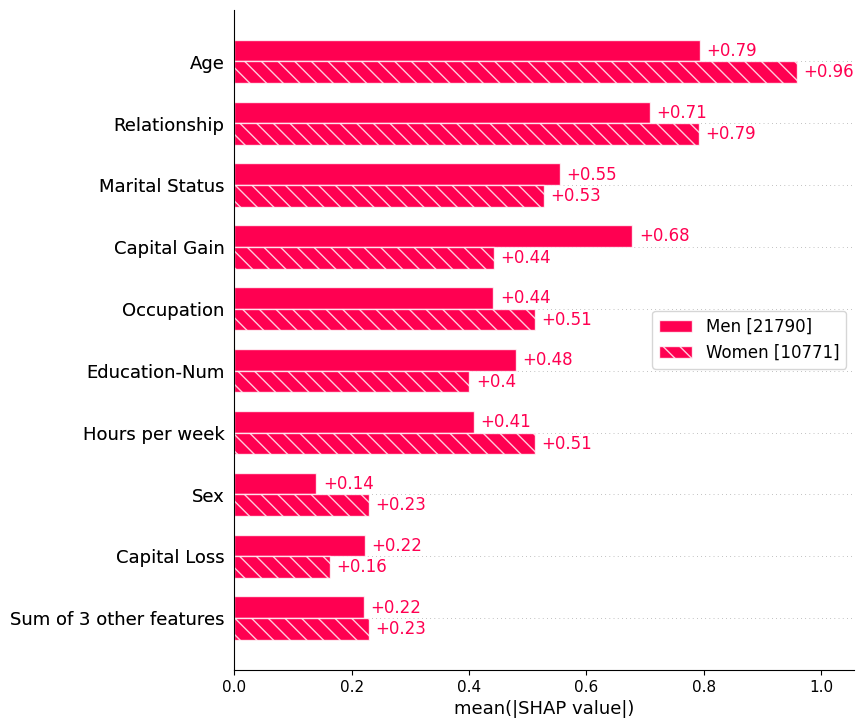

In [19]:
sex = ["Women" if shap_values[i,"Sex"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

In [20]:
# Quest 8: What can you infer from the above graph ?

# Ans 8: We can see Shapely values of all the features seggregated as male and female for the sex feature.
# For example: The shapely value for Capital Loss for all the rows in the dataset that have sex="1" i.e. Male, is 0.28
# Similarly the shapely value for Capital Loss for all the rows in the dataset that have sex="0" i.e. Female,  is 0.21
# In general the Capital Loss feature's effect on the final prediction cannot be considered significant
# as it is placed very low compared to other features in the graph

# For analysis of the local effect of the features we can use the following plots.

# Local Bar Plot

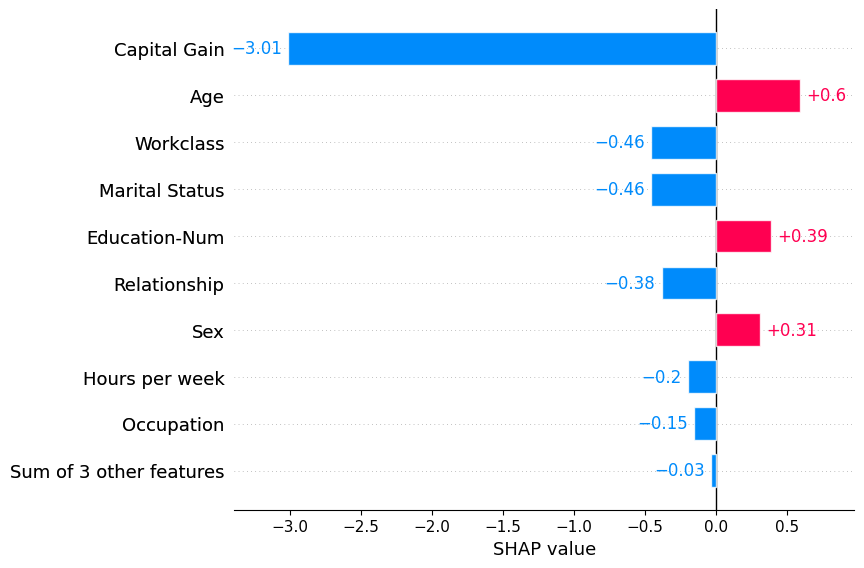

In [21]:
shap.plots.bar(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature.

In [22]:
# Quest 9: The SHAP value for the Capital Gain feature for one specific instance/row is -2.98. What does '-' sign indicate ?
# Will it have positive or negative effect on final predction ?

# Ans 9: '-' sign indicates the magnitude of shap value.
# It will have a negative impact on the prediction which means the model prediction will be pushed towards  "< 50 k".

In [23]:
# Quest 10: What can you say about the occupation feature for the given instance/row.

# Ans 10: The negative shap value of Occupation feature means it will have negative impact on the final prediction.
# Since it is positioned lower in the graph, the effect it will have will not be very significant.

# Waterfall plot

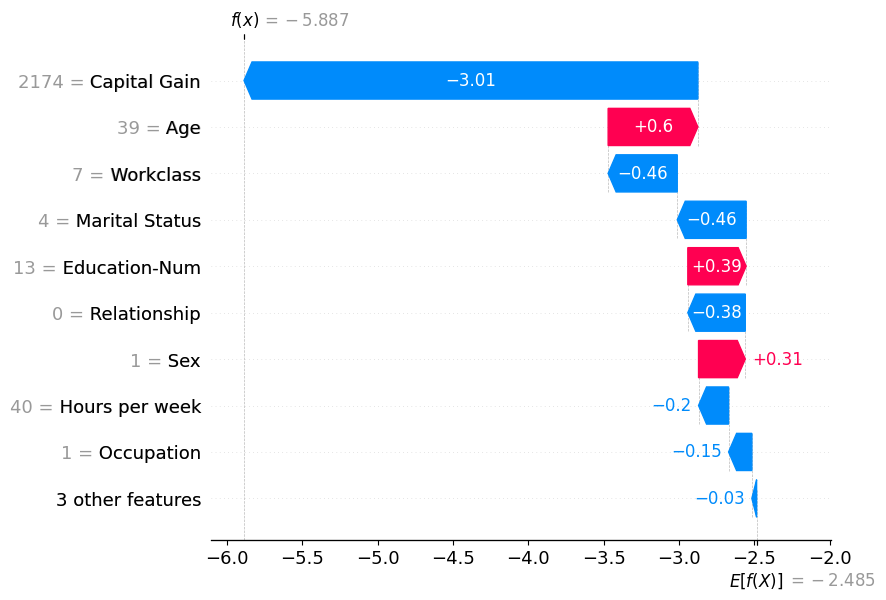

In [24]:
shap.plots.waterfall(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature.

In [25]:
# Quest 11: Explain your observation with respect to the Sex feature as given in the graph.

# Ans 11: For a specific row value for sex column is 1, and the positive SHAP value indicates a positive effect on the final prediction
# i.e. Annual Income > 50k will be favoured. But compared to marital class, work class, or age factors the effect will not be significant.

# Force Plot

In [26]:
shap.initjs()
shap.force_plot(shap_values[0])

The force plot is another way to see the effect each feature has on the prediction, for a given observation. In this plot the positive SHAP values are displayed on the left side and the negative on the right side, as if competing against each other. The highlighted value is the prediction for that observation.

## Conclusion 

1. Age is the most important feature here.
2. The least important features that have hardly any effect on the final prediction are represented by 'Sum of 3 other features'
3. As the age of a person increases,it has a positive impact means income is >50k
4. As the value for number of hours per week increases, it will have positive impact i.e.prediction will be pushed towards towards income > 50k
5. Capital Gain feature has either 0 value in the dataset or a very high positive value. Whenever the Capital Gain feature has a positive value, it will have a high impact on the final prediction
6. For higher values of the sex feature as given in dataset, the prediction will be effected in positive way. That means "male" value for sex feature will push prediction towards ">50k" possibility.
But the sex feature appears lower in the order as represented in graph,hence whatever effect it has on final prediction won't be of much significance.
7. The negative shap value of Occupation feature means it will have negative impact on the final prediction. Since it is positioned lower in the graph, the effect it will have will not be very significant.
8. For a specific row value for sex column is 1, and the positive SHAP value indicates a positive effect on the final prediction  i.e. Annual Income > 50k will be favoured. But compared to marital class, work class, or age factors the effect will not be significant.